# Training Models

## Linear Regression

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [6]:
y.shape

(100, 1)

In [7]:
X.shape

(100, 1)

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.subplot(111);
plt.scatter(X,y);

In [9]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

$y = 4 + 3x_{1} + Gaussian noise$

In [10]:
theta_best

array([[ 3.80376412],
       [ 3.06564791]])

In [11]:
X_new = np.array([[0], [2]])

X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.80376412],
       [ 9.93505994]])

[0, 2, 0, 15]

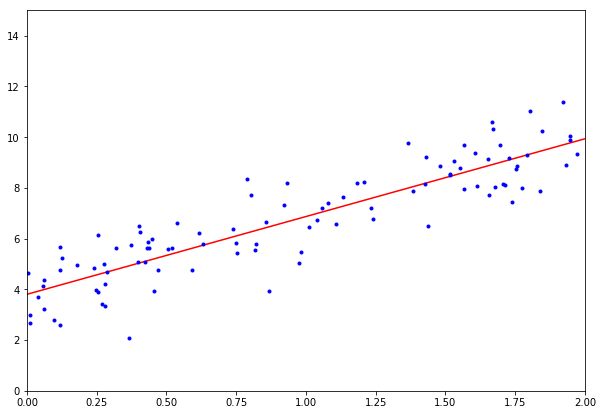

In [12]:
plt.figure(figsize=(10,7))

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([ 3.80376412]), array([[ 3.06564791]]))

In [14]:
lin_reg.predict(X_new)

array([[ 3.80376412],
       [ 9.93505994]])

## Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

### Batch Gradient Descent

In [15]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [17]:
theta

array([[ 3.78842137],
       [ 3.08295672]])

### Stochastic Gradient Descent

Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)

sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.82245594]), array([ 3.08106553]))

### Mini-batch Gradient Descent

The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs

## Polynomial Regression

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

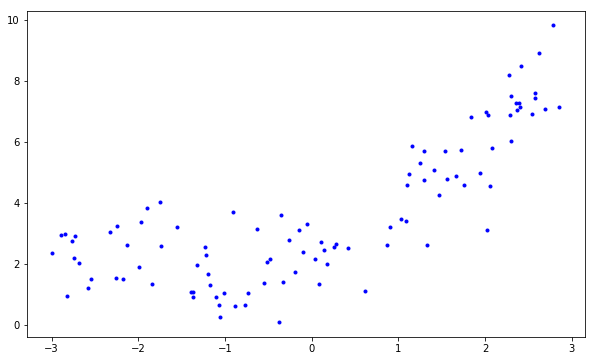

In [23]:
plt.figure(figsize=(10,6))

plt.plot(X,y, 'b.')

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [25]:
X[0]

array([ 2.62433179])

In [26]:
X_poly[0]

array([ 2.62433179,  6.88711732])

`X_poly` now contains the original feature of `X` plus the square of this feature

In [27]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([ 2.34234567]), array([[ 1.02560136,  0.40347554]]))

In [30]:
y_pred = lin_reg.predict(X_poly)

In [56]:
y_pred.shape

(100, 1)

In [57]:
X.shape

(100, 1)

In [53]:
import seaborn as sns

sns.set()

In [66]:
import pandas as pd

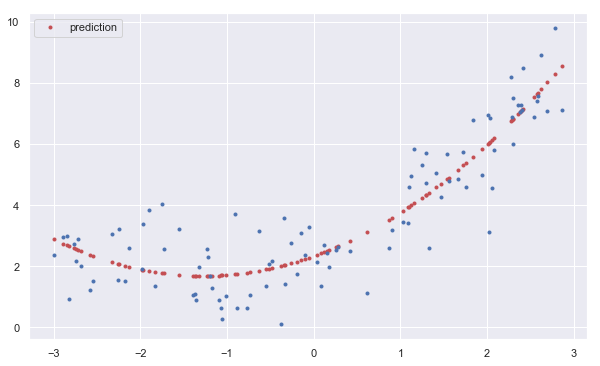

In [87]:
plt.figure(figsize=(10,6))

plt.plot(X, y_pred, 'r.', label='prediction')

plt.plot(X, y, 'b.' )

plt.legend();

## Learning Curves

 **If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.**

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.ylabel('RMSE')
    plt.xlabel('Training Set Size')
    plt.legend()

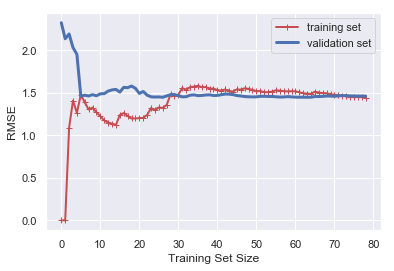

In [99]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

On validation Set, When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down

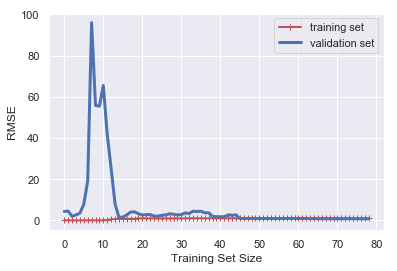

In [128]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

## Regularized Linear Models

### Ridge Regression (Tikhonov regularization)